In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('data/df_prepped.csv')
df.head()

,unq_id,timestamp,customer_no,location,revenue_per_minute,before
0,Cust_2019-09-02 07:03:00_no_1,2019-09-02 07:03:00,1,dairy,5,NaN
1,Cust_2019-09-02 07:03:00_no_2,2019-09-02 07:03:00,2,dairy,5,dairy
2,Cust_2019-09-02 07:04:00_no_3,2019-09-02 07:04:00,3,dairy,5,dairy
3,Cust_2019-09-02 07:04:00_no_4,2019-09-02 07:04:00,4,dairy,5,dairy
4,Cust_2019-09-02 07:04:00_no_5,2019-09-02 07:04:00,5,spices,3,dairy


In [3]:
df.tail()

,unq_id,timestamp,customer_no,location,revenue_per_minute,before
24872,Cust_2019-09-06 21:50:00_no_1500,2019-09-06 21:50:00,1500,dairy,5,fruit
24873,Cust_2019-09-06 21:50:00_no_1507,2019-09-06 21:50:00,1507,checkout,0,dairy
24874,Cust_2019-09-06 21:50:00_no_1508,2019-09-06 21:50:00,1508,checkout,0,checkout
24875,Cust_2019-09-06 21:50:00_no_1509,2019-09-06 21:50:00,1509,drinks,6,checkout
24876,Cust_2019-09-06 21:50:00_no_1510,2019-09-06 21:50:00,1510,spices,3,drinks


### Calculate the total number of customers in each section

### Calculate the total number of customers in each section over time

### Display the number of customers at checkout over time

### Calculate the time each customer spent in the market

### Calculate the total number of customers in the supermarket over time

#### Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”)

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.dtypes

unq_id                        object
timestamp             datetime64[ns]
customer_no                    int64
location                      object
revenue_per_minute             int64
before                        object
dtype: object

In [5]:
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df.head()

,unq_id,timestamp,customer_no,location,revenue_per_minute,before,day,hour
0,Cust_2019-09-02 07:03:00_no_1,2019-09-02 07:03:00,1,dairy,5,NaN,2,7
1,Cust_2019-09-02 07:03:00_no_2,2019-09-02 07:03:00,2,dairy,5,dairy,2,7
2,Cust_2019-09-02 07:04:00_no_3,2019-09-02 07:04:00,3,dairy,5,dairy,2,7
3,Cust_2019-09-02 07:04:00_no_4,2019-09-02 07:04:00,4,dairy,5,dairy,2,7
4,Cust_2019-09-02 07:04:00_no_5,2019-09-02 07:04:00,5,spices,3,dairy,2,7


In [6]:
grouped_df = df.groupby(["day","hour",'location'])
grouped_df = grouped_df.agg({"unq_id": "nunique"})
grouped_df = grouped_df.reset_index()

,day,hour,location,unq_id
0,2,7,checkout,92
1,2,7,dairy,59
2,2,7,drinks,60
3,2,7,fruit,54
4,2,7,spices,52
...,...,...,...,...
370,6,21,checkout,52
371,6,21,dairy,39
372,6,21,drinks,34
373,6,21,fruit,36


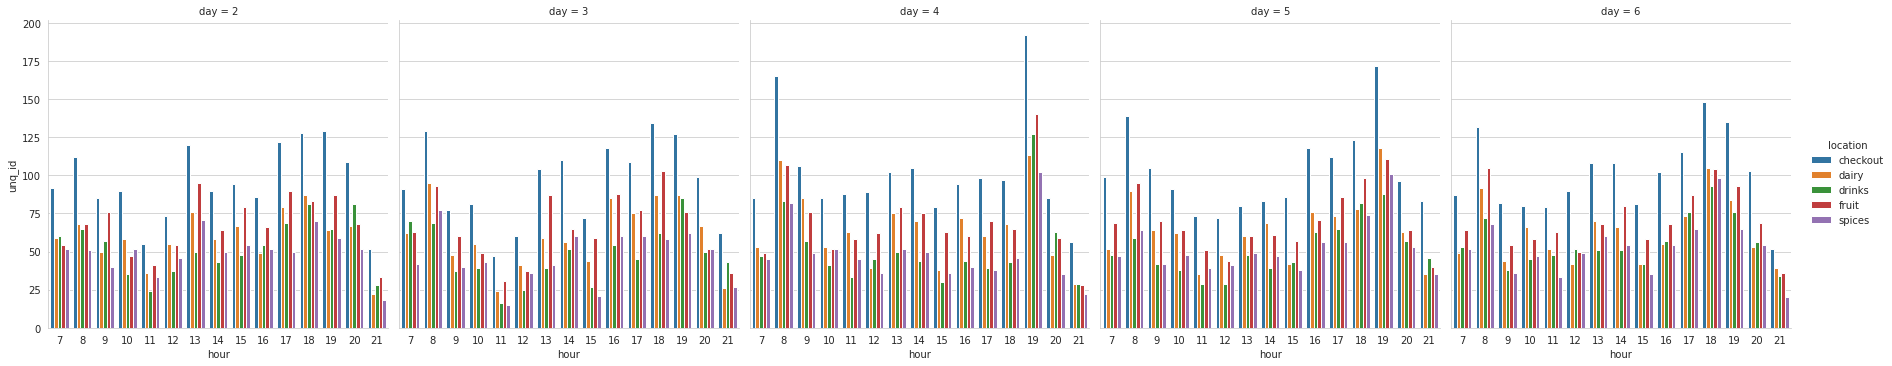

In [7]:
sns.catplot(data=grouped_df, kind="bar",
            x="hour", y="unq_id", hue="location", col="day");

In [8]:
dairy_group = grouped_df[grouped_df['location'] == "dairy"]
drinks_group = grouped_df[grouped_df['location'] == "drinks"]
spices_group = grouped_df[grouped_df['location'] == "spices"]
fruit_group = grouped_df[grouped_df['location'] == "fruit"]
check_out_group = grouped_df[grouped_df['location'] == "checkout"]

<AxesSubplot:title={'center':'Check-Out'}, xlabel='hour', ylabel='unq_id'>

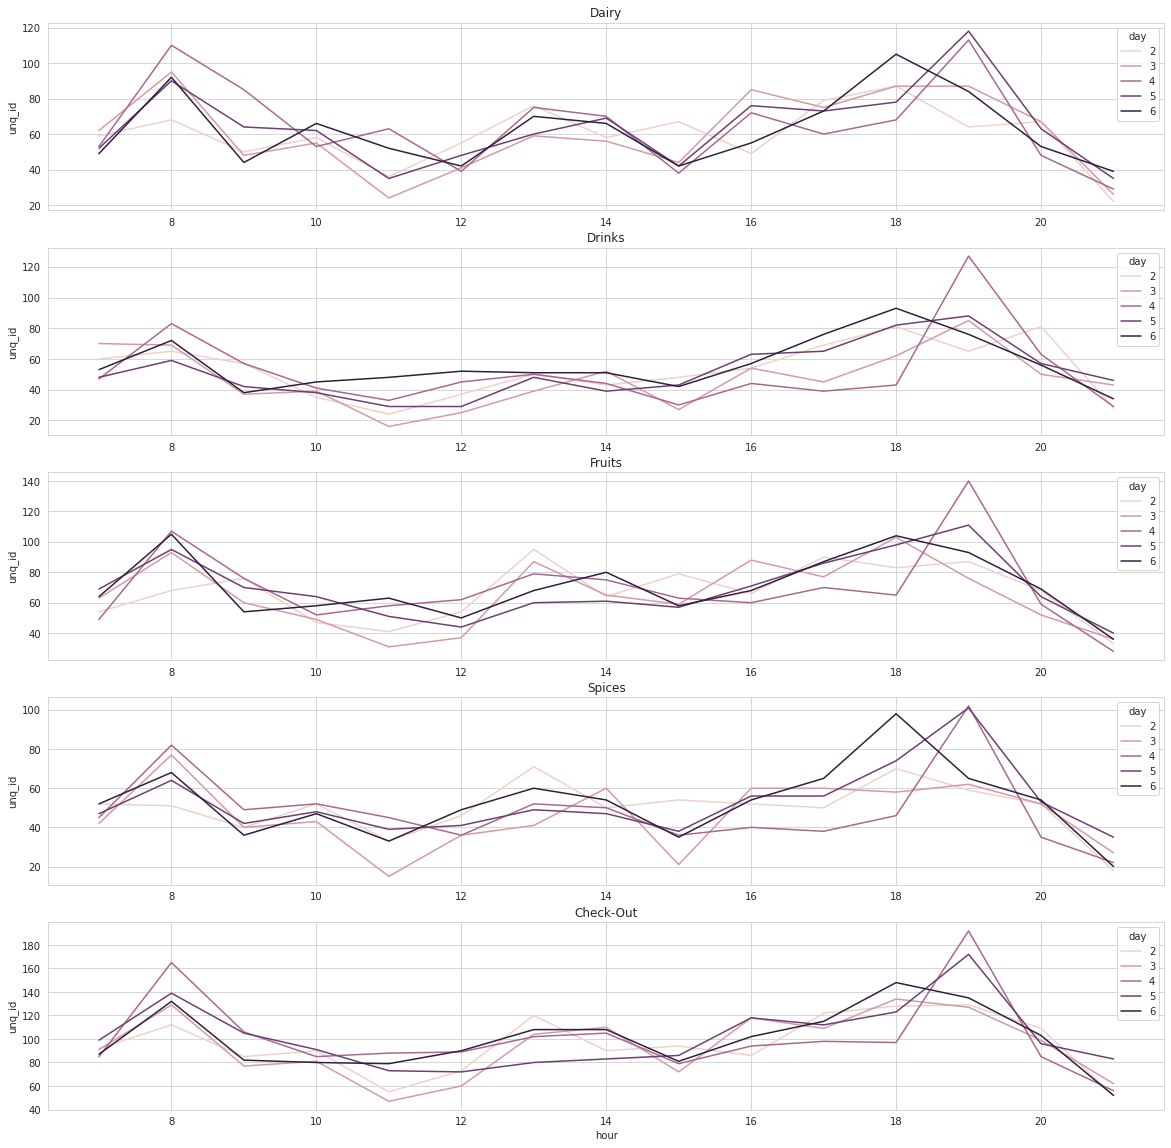

In [9]:
plt.figure(figsize = (20,20))
plt.subplot(5,1,1)
plt.title ('Dairy')
sns.lineplot(data = dairy_group, x = 'hour', y = 'unq_id', hue = 'day')
plt.xlabel("")

plt.subplot(5,1,2)
plt.title ('Drinks')
sns.lineplot(data = drinks_group, x = 'hour', y = 'unq_id', hue = 'day')
plt.xlabel("")

plt.subplot(5,1,3)
plt.title ('Fruits')
sns.lineplot(data = fruit_group, x = 'hour', y = 'unq_id', hue = 'day')
plt.xlabel("")

plt.subplot(5,1,4)
plt.title ('Spices')
sns.lineplot(data = spices_group, x = 'hour', y = 'unq_id', hue = 'day')
plt.xlabel("")

plt.subplot(5,1,5)
plt.title ('Check-Out')
sns.lineplot(data = check_out_group, x = 'hour', y = 'unq_id', hue = 'day')

In [10]:
grouped_df.to_csv('data/grouped_by_day_hour_location.csv')

In [11]:
grouped_df.groupby('hour')['unq_id'].mean().to_csv('data/grouped_by_hour_means.csv')

In [12]:
grouped_df.groupby(['day', 'hour'])['unq_id'].mean().to_csv('data/grouped_by_day_hour_means.csv')

In [13]:
grouped_df.groupby(['day', 'hour', 'location'])['unq_id'].mean().to_csv('data/grouped_by_day_hour_location_means.csv')